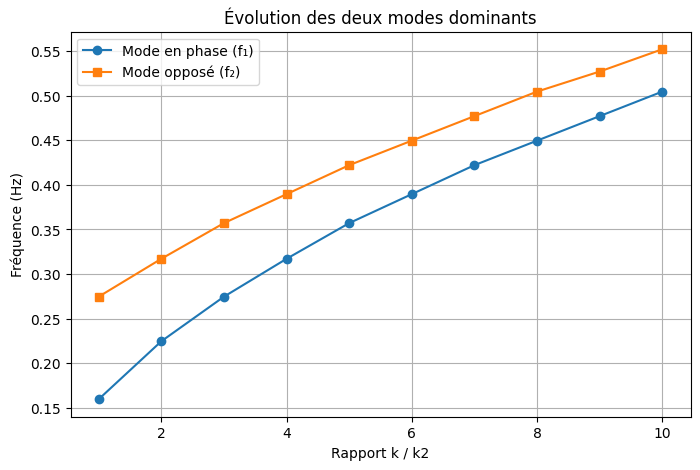

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.fft import fft, fftfreq

# Pareil qu'avant, mais avec k variable. On veut garder k2 constant (soit le ressort entre les deux masses)
# pour voir l'effet de k seul.
k2=1  # N/m
m1=1  # kg
m2=1  # kg
x1=1  # m
x2=0  # m
v1=0  # m/s
v2=0  # m/s


y=[x1,x2,v1,v2]


def equations_motion(t,y, k): # même chose que précédemment, mais avec k en argument
    x1, x2, v1, v2 = y
    a1= -((k+k2)*x1)/m1 +k2*x2/m1 # m/s^2
    a2= -((k+k2)*x2)/m2 +k2*x1/m2 # m/s^2
    return [v1, v2, a1, a2]

def deux_modes_dominants(signal, t): #calcule la fft et retourne les deux fréquences dominantes
    dt = t[1] - t[0] # intervalle de temps
    freqs = fftfreq(len(t), dt) # calcul des fréquences
    amps = np.abs(fft(signal))*2/len(t) # calcul des amplitudes normalisées
    mask = freqs > 0  # on ne garde que les fréquences positives
    freqs = freqs[mask] # fréquences positives
    amps = amps[mask] # amplitudes correspondantes
  
    peak_indices = np.argsort(amps)[-2:]  # indices des deux plus grandes amplitudes
    return sorted(freqs[peak_indices]) 


# Résolution pour différentes valeurs de k
k_values = np.linspace(1, 10, 10)  # N/m
mode1_freqs = [] # listes pour stocker les fréquences des deux modes
mode2_freqs = [] 

for k in k_values: # boucle sur les différentes valeurs de k
    temps = (0, 400)
    y0 = [1, 0, 0, 0]  # conditions initiales: x1=1, x2=0, v1=0, v2=0
    sol = solve_ivp(lambda t, y: equations_motion(t, y, k), temps, y0, t_eval=np.linspace( *temps , 1000), method='RK45') # résolution de l'EDO
    f_mode1, f_mode2 = deux_modes_dominants(sol.y[0], sol.t) # calcul des deux modes dominants
    mode1_freqs.append(np.abs(f_mode1)) # stockage des fréquences
    mode2_freqs.append(np.abs(f_mode2)) 


plt.figure(figsize=(8, 5)) # graphique des fréquences en fonction du rapport k/k2
plt.plot(k_values / k2 , mode1_freqs, 'o-', label='Mode en phase (f₁)')
plt.plot(k_values / k2 , mode2_freqs, 's-', label='Mode opposé (f₂)')
plt.xlabel('Rapport k / k2')
plt.ylabel('Fréquence (Hz)')
plt.title('Évolution des deux modes dominants')
plt.legend()
plt.grid(True)
plt.show()





Sur ce graph, les deux courbes distinctes correspondent au deux modes:
-mode en phase 
-mode en opposition de phase
Ce sont les fréquences propres du système qu'on a pu observer auparavant.
Il est normale que ces courbes augmentent car plus le ressort est rigide plus le système oscille rapidement (Les fréquences augmentent aussi). Quand le rapport k/k2 est plus faible, l'écart entre les deux fréquences diminue.

Pour observer les différents régimes, deux exemples sont fait avec des raideurs soit très différentes soit très similaire:

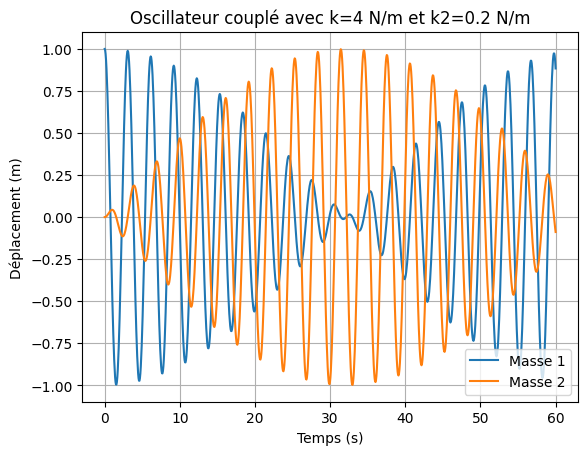

In [75]:
k, k2 = 4, 0.2  # N/m
sol1 = solve_ivp(lambda t, y: equations_motion(t, y, k), [0, 60], [1, 0, 0, 0], t_eval=np.linspace(0, 60, 1000), method='RK45')
plt.plot(sol1.t, sol1.y[0], label='Masse 1')
plt.plot(sol1.t, sol1.y[1], label='Masse 2')
plt.xlabel('Temps (s)')
plt.ylabel('Déplacement (m)')
plt.title('Oscillateur couplé avec k=4 N/m et k2=0.2 N/m')
plt.legend()
plt.grid()
plt.show()


On voit ici que, quand une masse bouge beaucoup l'autre se déplace moins et inversément. On peut aussi remarquer que les masses bougent "ensemble", ils sont souvent dans la moitié inférieur ou supérieur presque en même temps.

Maintenant, quand on inverse la rigidité des deux ressort:

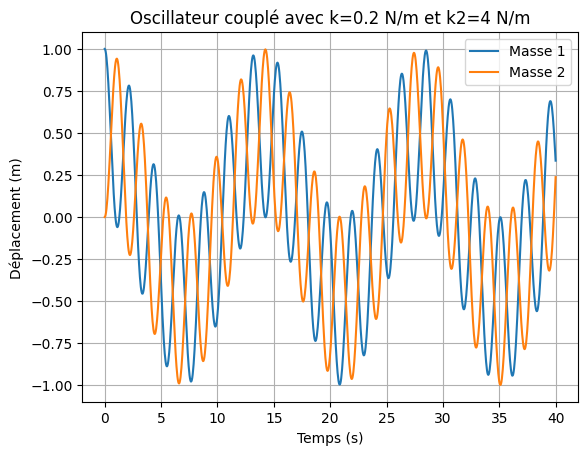

In [76]:
k, k2 = 0.2, 4  # N/m
sol2 = solve_ivp(lambda t, y: equations_motion(t, y, k), [0, 40], [1, 0, 0, 0], t_eval=np.linspace(0, 40, 1000), method='RK45')
plt.plot(sol2.t, sol2.y[0], label='Masse 1')
plt.plot(sol2.t, sol2.y[1], label='Masse 2')
plt.xlabel('Temps (s)')
plt.ylabel('Déplacement (m)')
plt.title('Oscillateur couplé avec k=0.2 N/m et k2=4 N/m')
plt.legend()
plt.grid()
plt.show()

On peut voir ici que les masses sont toujours dans les direcitions opposées(quand un est en haut l'autre est en bas). Les masses vibrents l'une contre l'autre et elles se déplacent ensemble dans une oscillation plus lente elle-même.

L'oscillateur simple ressemble à la même chose qu'avant, il n'a toujours qu'un ressort, son oscillation sera plus ou moins rapide dépendament de la rigidité du ressort.